#**Data Pre Processing**


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/flights.csv')

In [4]:
df.head()

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,0,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890
1,1,SpiceJet,2019-01-03,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744
2,2,Jet Airways,2019-01-03,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992
3,3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135
4,4,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735


**Checking duplicate values**

In [5]:
df[df.duplicated()].head()


,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price


In [6]:
#total len of dataset
len(df)

10683

In [8]:
#checking is dataset contain null value or not
df.isnull().sum()

index              0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#total stop have null value so we use fill na that put the above value in Nan or empty space
df['Total_Stops'].fillna(0, inplace=True)

In [10]:
df.isnull().sum()

index              0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.head()

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,0,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890
1,1,SpiceJet,2019-01-03,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744
2,2,Jet Airways,2019-01-03,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992
3,3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135
4,4,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735


In [12]:
df['Source'].unique()# unique value of source or which station is used from as departure

array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)

In [96]:
#labeling data from str to int according to below pattern for "source column"
# 0.0 -> Banglore
# 1.0 -> Chennai
# 2.0 -> Delhi
# 3.0 -> Kolkata
# 4.0 -> Mumbai

#labeling for "Airline column"
# 0.0 -> Air Asia
# 1.0 -> Air India
# 2.0 -> GoAir
# 3.0 -> IndiGo
# 4.0 -> Jet Airways
# 5.0 -> Jet Airways Business
# 6.0 -> Multiple carriers
# 7.0 -> Multiple carriers Premium economy
# 8.0 -> SpiceJet
# 9.0 -> Trujet
# 10.0 -> Vistara
# 11.0 -> Vistara Premium economy

# mapping label for "total stops" columns
# 0.0 ->0
# 1.0 -> '1 stop',
# 2.0->'2 stops',
# 3.0 ->'3 stops',
# 4.0 ->'4 stops',
# 5.0 ->'non-stop',

#mapping label for "Additional_Info" columns
#  0.0->'1 Long layover'
#  1.0->'1 Short layover'
#  2.0->'2 Long layover'
#  3.0->'Business class'
#  4.0->'Change airports'
#  5.0->'In-flight meal not included'
#  6.0->'No Info'
#  7.0->'No check-in baggage included'
#  8.0->'No info'
#  9.0->'Red-eye flight'

#mapping labeling for duration columns
#0.0 ->  5m,    1.0 ->1h 25m ,      2.0 -> 10h 25m ,       3.0 -> 10h 55m ,   4.0 -> 12h 20m ,
#5.0 ->13h 5m,  6.0 ->14h 20m,      7 .0->14h 45m,         8.0 ->'16h 20m',   9.0 -> 16h 55m,
#10.0 ->17h 30m,  11.0 ->19h 15m,   12.0 ->2h 20m,        13.0 ->20h 20m,     14.0 ->21h 5m,
#15.0 ->21h 5m,   16.0 ->22h 30m,   17.0 ->23h 45m,       18.0 ->25h 10m,     19.0 ->25h 45m   ,
#20.0 ->27h 25m  ,21.0 ->27h 40m,   22.0 ->28h 50m,       23.0 ->2h 35m,      24.0 ->30h 25m    ,
#25.0 ->    ,26.0 ->    ,27.0->     ,28.0 ->    ,29.0 ->    ,
#30.0 ->    ,31.0 ->    ,32.0 ->    ,33.0 ->    ,34.0 ->    ,35.0 ->    ,36.0 ->    ,37.0 ->    ,38.0 ->    ,39.0 ->    ,
#40.0 ->    ,41.0 ->    ,42.0 ->    ,43.0 ->    ,44.0 ->    ,45.0 ->
# for i in range(len(df1)-1):
#     if df['Duration'][i]==24.0:
#         print(i)
#         break

In [21]:
#labeling data from str to int according to below pattern for source column
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

df['Source'] = encoder.fit_transform(df[['Source']])

In [22]:
df['Destination'].unique()# unique value of Destination

array(['New Delhi', 'Kolkata', 'Cochin', 'Banglore', 'Hyderabad', 'Delhi'],
      dtype=object)

In [23]:
#labeling data from str to int according to below pattern for destination columns
# 0 -> Banglore
# 1 -> Cochin
# 2 -> Delhi
# 3 -> Hyderabad
# 4 -> Kolkata
# 5 -> New Delhi
#df['Total_Stops'] = df['Total_Stops'].astype(str)

encoder = OrdinalEncoder()

df['Destination'] = encoder.fit_transform(df[['Destination']])

In [24]:
df['Total_Stops'].unique()

array(['1 stop', '2 stops', '3 stops', 'non-stop', '4 stops', 0],
      dtype=object)

In [25]:
df['Destination'].unique()# unique value of Destination

array([5., 4., 1., 0., 3., 2.])

In [26]:
#converting 1 stop to  only 1 for int

df['Total_Stops'] = df['Total_Stops'].astype(str)

encoder = OrdinalEncoder()

df['Total_Stops'] = encoder.fit_transform(df[['Total_Stops']])


In [27]:
#in this function we converting time str to digit like if time have "13h 34m" i am considering 30m+ to increase in hour it become 14

def update_duration(duration):
    parts = duration.split('h ')

    hours = 0
    minutes = 0

    if len(parts) == 1:
        if 'h' in parts[0]:
            hours = int(parts[0].split('h')[0])
        elif 'm' in parts[0]:
            minutes = int(parts[0].split('m')[0])
    else:
        hours = int(parts[0])
        minutes = int(parts[1].split('m')[0])

    if minutes >= 30:
        hours += 1

    return str(hours)

df['Duration'] = df['Duration'].apply(update_duration)



In [28]:


df.tail(10)

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
10673,10673,Multiple carriers,2019-12-06,2.0,1.0,19:00,7,1.0,No info,6795
10674,10674,Jet Airways,2019-12-06,3.0,0.0,20:00,16,1.0,No info,13044
10675,10675,Jet Airways,2019-12-06,3.0,0.0,10:20,7,1.0,No info,8355
10676,10676,Jet Airways,2019-12-06,3.0,0.0,16:30,20,1.0,No info,13044
10677,10677,Jet Airways,2019-12-06,3.0,0.0,14:05,7,1.0,In-flight meal not included,9899
10678,10678,Multiple carriers,2019-12-06,2.0,1.0,9:15,10,1.0,No info,11622
10679,10679,IndiGo,2019-12-06,3.0,0.0,8:10,5,1.0,No info,5069
10680,10680,Jet Airways,2019-12-06,2.0,1.0,22:50,20,1.0,No info,14714
10681,10681,Air Asia,2019-12-06,3.0,0.0,7:35,16,1.0,No info,5192
10682,10682,Jet Airways,2019-12-06,2.0,1.0,21:50,7,1.0,In-flight meal not included,10262


In [29]:
df['Airline'].unique()

array(['Jet Airways', 'SpiceJet', 'Air India', 'IndiGo', 'Air Asia',
       'Vistara', 'GoAir', 'Jet Airways Business', 'Multiple carriers',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

In [32]:
df['Destination'].unique()
# 0 -> Banglore
# 1 -> Cochin
# 2 -> Delhi
# 3 -> Hyderabad
# 4 -> Kolkata
# 5 -> New Delhi


array([5., 4., 1., 0., 3., 2.])

In [ ]:
df['Total_Stops'].unique()

array([1., 2., 3., 5., 4., 0.])

In [33]:
df['Airline'].unique()

array(['Jet Airways', 'SpiceJet', 'Air India', 'IndiGo', 'Air Asia',
       'Vistara', 'GoAir', 'Jet Airways Business', 'Multiple carriers',
       'Vistara Premium economy', 'Multiple carriers Premium economy',
       'Trujet'], dtype=object)

In [34]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
encoder = OrdinalEncoder()

df['Airline'] = encoder.fit_transform(df[['Airline']])

In [39]:
df['Airline'].unique()

array([ 4.,  8.,  1.,  3.,  0., 10.,  2.,  5.,  6., 11.,  7.,  9.])

In [40]:
df.head()

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,0,4.0,2019-01-03,0.0,5.0,11:40,13,1.0,No info,26890
1,1,8.0,2019-01-03,0.0,5.0,15:35,8,1.0,1 Long layover,7744
2,2,4.0,2019-01-03,0.0,5.0,8:00,12,1.0,No info,27992
3,3,1.0,2019-01-03,0.0,5.0,8:50,39,2.0,No info,17135
4,4,4.0,2019-01-03,0.0,5.0,11:40,24,1.0,No info,25735


In [41]:
df3 = df.drop(['Date_of_Journey','Additional_Info','Dep_Time','index'], axis=1)

In [42]:
df['Date_of_Journey'].dtype

dtype('O')

In [43]:
df3

,Airline,Source,Destination,Duration,Total_Stops,Price
0,4.0,0.0,5.0,13,1.0,26890
1,8.0,0.0,5.0,8,1.0,7744
2,4.0,0.0,5.0,12,1.0,27992
3,1.0,0.0,5.0,39,2.0,17135
4,4.0,0.0,5.0,24,1.0,25735
...,...,...,...,...,...,...
10678,6.0,2.0,1.0,10,1.0,11622
10679,3.0,3.0,0.0,5,1.0,5069
10680,4.0,2.0,1.0,20,1.0,14714
10681,0.0,3.0,0.0,16,1.0,5192


In [44]:
df.columns

Index(['index', 'Airline', 'Date_of_Journey', 'Source', 'Destination',
       'Dep_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

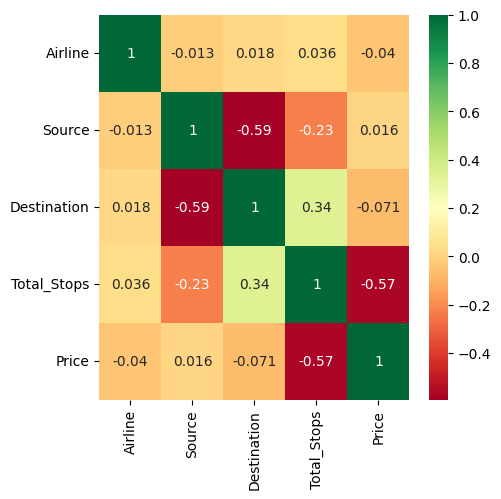

In [131]:
#correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(df3.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [46]:
x = df.drop(['Date_of_Journey','Additional_Info','Dep_Time','index','Price'], axis=1)
y= df['Price']

In [ ]:
df.head(3)

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,0,4.0,2019-01-03,0.0,5.0,11:40,13,1.0,No info,26890
1,1,8.0,2019-01-03,0.0,5.0,15:35,8,1.0,1 Long layover,7744
2,2,4.0,2019-01-03,0.0,5.0,8:00,12,1.0,No info,27992


In [52]:

def convert_dep_time(time_str):
    # Split the time into hours and minutes
    hours, minutes = map(int, time_str.split(':'))

    # Convert time to minutes since midnight
    total_minutes = hours * 60 + minutes

    # Subtract from 24 hours and add a random concept
    converted_time = 24*60 - total_minutes + 45

    # Convert back to hours and minutes
    converted_hours = converted_time // 60
    converted_minutes = converted_time % 60

    return converted_hours

# Apply the custom function to the 'Dep_Time' column
df['Dep_Time_Converted'] = df['Dep_Time'].apply(convert_dep_time)



In [53]:
df['Date_of_Journey'].unique()

array(['2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
       '2019-03-03', '2019-03-04', '2019-03-05', '2019-03-06',
       '2019-03-15', '2019-03-18', '2019-03-21', '2019-03-24',
       '2019-03-27', '2019-04-15', '2019-04-18', '2019-04-21',
       '2019-04-24', '2019-04-27', '2019-05-15', '2019-05-18',
       '2019-05-21', '2019-05-24', '2019-05-27', '2019-06-03',
       '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-15',
       '2019-06-18', '2019-06-21', '2019-06-24', '2019-06-27',
       '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
       '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06'],
      dtype=object)

In [54]:


# Convert the 'Date' column to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Calculate the number of days since a reference date
#In each column the date will be updated by subracted current date from reference date and convert one dight
reference_date = pd.to_datetime('2018-01-01')
df['DaysSinceReference'] = (df['Date_of_Journey'] - reference_date).dt.days



In [55]:
#encoding the additional infor
encoder = OrdinalEncoder()

df['Additional_Info'] = encoder.fit_transform(df[['Additional_Info']])

In [56]:
encoder = OrdinalEncoder()

df['DaysSinceReference'] = encoder.fit_transform(df[['DaysSinceReference']])

In [57]:
#Dep_Time_Converted
encoder = OrdinalEncoder()

df['Dep_Time_Converted'] = encoder.fit_transform(df[['Dep_Time_Converted']])

In [58]:
encoder = OrdinalEncoder()

df['Duration'] = encoder.fit_transform(df[['Duration']])

In [59]:
z = df.drop(['Date_of_Journey','index','Dep_Time'], axis=1)
y= df['Price']

Now after splitting remove duplicates from x train and y train

In [118]:
z.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Converted,DaysSinceReference
0,4.0,0.0,5.0,5.0,1.0,8.0,26890,13.0,0.0
1,8.0,0.0,5.0,44.0,1.0,0.0,7744,9.0,0.0
2,4.0,0.0,5.0,4.0,1.0,8.0,27992,16.0,0.0
3,1.0,0.0,5.0,33.0,2.0,8.0,17135,15.0,0.0
4,4.0,0.0,5.0,17.0,1.0,8.0,25735,13.0,0.0


In [61]:
df.head()

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Converted,DaysSinceReference
0,0,4.0,2019-01-03,0.0,5.0,11:40,5.0,1.0,8.0,26890,13.0,0.0
1,1,8.0,2019-01-03,0.0,5.0,15:35,44.0,1.0,0.0,7744,9.0,0.0
2,2,4.0,2019-01-03,0.0,5.0,8:00,4.0,1.0,8.0,27992,16.0,0.0
3,3,1.0,2019-01-03,0.0,5.0,8:50,33.0,2.0,8.0,17135,15.0,0.0
4,4,4.0,2019-01-03,0.0,5.0,11:40,17.0,1.0,8.0,25735,13.0,0.0


In [62]:
z[z.duplicated()].head()


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Converted,DaysSinceReference
71,1.0,0.0,5.0,33.0,2.0,8.0,17135,15.0,0.0
91,4.0,0.0,5.0,17.0,1.0,8.0,22270,16.0,0.0
130,3.0,3.0,0.0,23.0,5.0,8.0,6565,9.0,0.0
142,4.0,0.0,5.0,2.0,1.0,8.0,26890,19.0,0.0
286,1.0,3.0,0.0,7.0,1.0,8.0,7893,7.0,1.0


In [63]:
print(z.duplicated().sum())


307


In [64]:
z.drop_duplicates(keep='first',inplace=True)


In [66]:
x = z.drop(['Price'], axis=1)
y= z['Price']

In [67]:
x.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Dep_Time_Converted,DaysSinceReference
0,4.0,0.0,5.0,5.0,1.0,8.0,13.0,0.0
1,8.0,0.0,5.0,44.0,1.0,0.0,9.0,0.0
2,4.0,0.0,5.0,4.0,1.0,8.0,16.0,0.0
3,1.0,0.0,5.0,33.0,2.0,8.0,15.0,0.0
4,4.0,0.0,5.0,17.0,1.0,8.0,13.0,0.0


In [68]:
y = z['Price']

x = z.drop(['Price'], axis=1)

duplicate_indices = x.duplicated().index[x.duplicated()]

y_no_duplicates = y.drop(duplicate_indices)

x_no_duplicates = x.drop_duplicates()

In [69]:
x_no_duplicates.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Dep_Time_Converted,DaysSinceReference
0,4.0,0.0,5.0,5.0,1.0,8.0,13.0,0.0
1,8.0,0.0,5.0,44.0,1.0,0.0,9.0,0.0
2,4.0,0.0,5.0,4.0,1.0,8.0,16.0,0.0
3,1.0,0.0,5.0,33.0,2.0,8.0,15.0,0.0
4,4.0,0.0,5.0,17.0,1.0,8.0,13.0,0.0


#**Apply  different model and check accuracy**

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_no_duplicates,y_no_duplicates,test_size = 0.2,random_state=42)




#**KNeighborsRegressor**

In [121]:
np.sqrt(x_train.shape[0])


87.84645695758026

In [122]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

knn_regressor = KNeighborsRegressor(n_neighbors=30)

knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

R-squared: 0.558034924052224
Mean Absolute Error: 2178.6805008635583


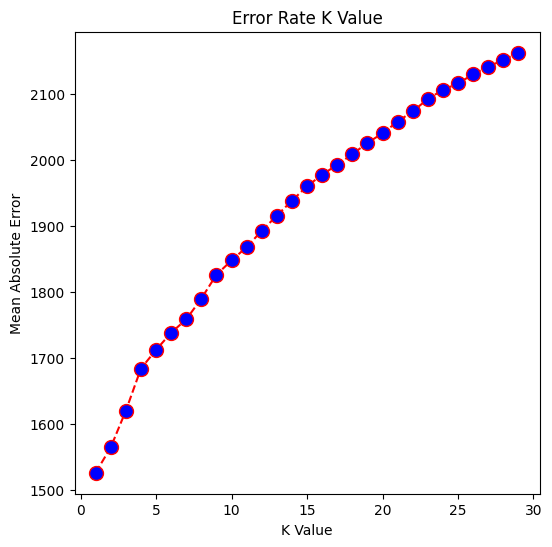

Minimum error: 1525.660621761658 at K = 1


In [123]:
import numpy as np
error = []
for i in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(np.abs(pred_i - y_test)))

# Plotting the error values
plt.figure(figsize=(6,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')
plt.show()

print("Minimum error:", min(error), "at K =", error.index(min(error)) + 1)

In [124]:
df.tail()

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Converted,DaysSinceReference
10678,10678,6.0,2019-12-06,2.0,1.0,9:15,2.0,1.0,8.0,11622,15.0,39.0
10679,10679,3.0,2019-12-06,3.0,0.0,8:10,41.0,1.0,8.0,5069,16.0,39.0
10680,10680,4.0,2019-12-06,2.0,1.0,22:50,13.0,1.0,8.0,14714,1.0,39.0
10681,10681,0.0,2019-12-06,3.0,0.0,7:35,8.0,1.0,8.0,5192,17.0,39.0
10682,10682,4.0,2019-12-06,2.0,1.0,21:50,43.0,1.0,5.0,10262,2.0,39.0


In [125]:
#Making prediction against one specific row
single_row_data = {'Airline': 3.0, 'Source': 3.0, 'Destination': 0.0, 'Duration': 41.0,'Additional_Info':8.0, 'Total_Stops': 1.0,'DaysSinceReference':39.0,'Dep_Time_Converted':16.0}
input_data = pd.DataFrame([single_row_data])

predicted_price = knn_regressor.predict(input_data[['Airline','Source','Destination', 'Duration','Total_Stops','Additional_Info','Dep_Time_Converted','DaysSinceReference']])

print(f'Predicted Price: {predicted_price[0]}')


Predicted Price: 9511.033333333333


#**Decision tree**

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import r2_score

decision_regressor = DecisionTreeRegressor()

decision_regressor.fit(x_train, y_train)

y_pred = decision_regressor.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

print(f'Mean Absolute Error: {mae}')


R-squared: 0.834777009986079
Mean Absolute Error: 867.0155440414508


In [127]:
# Iterate through each row in x_test
for index, row in x_test.iterrows():

    input_data = pd.DataFrame([row])

    predicted_price = decision_regressor.predict(input_data)

    actual_price = y_test.loc[index]

    print(f'Predicted Price: {predicted_price[0]}, Actual Price: {actual_price}')


Predicted Price: 4944.0, Actual Price: 4777
Predicted Price: 6171.0, Actual Price: 6162
Predicted Price: 10262.0, Actual Price: 10262
Predicted Price: 3543.0, Actual Price: 3543
Predicted Price: 4174.0, Actual Price: 4174
Predicted Price: 8586.0, Actual Price: 9663
Predicted Price: 4823.0, Actual Price: 4823
Predicted Price: 15129.0, Actual Price: 15129
Predicted Price: 4107.0, Actual Price: 4107
Predicted Price: 5583.0, Actual Price: 5583
Predicted Price: 3841.0, Actual Price: 3841
Predicted Price: 10262.0, Actual Price: 10262
Predicted Price: 4174.0, Actual Price: 4174
Predicted Price: 19495.0, Actual Price: 7725
Predicted Price: 20999.0, Actual Price: 14887
Predicted Price: 13067.0, Actual Price: 14388
Predicted Price: 14571.0, Actual Price: 14571
Predicted Price: 12373.0, Actual Price: 12373
Predicted Price: 4441.0, Actual Price: 6121
Predicted Price: 3597.0, Actual Price: 3597
Predicted Price: 12898.0, Actual Price: 8552
Predicted Price: 15419.0, Actual Price: 15419
Predicted Pric

In [128]:
df.tail()

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_Converted,DaysSinceReference
10678,10678,6.0,2019-12-06,2.0,1.0,9:15,2.0,1.0,8.0,11622,15.0,39.0
10679,10679,3.0,2019-12-06,3.0,0.0,8:10,41.0,1.0,8.0,5069,16.0,39.0
10680,10680,4.0,2019-12-06,2.0,1.0,22:50,13.0,1.0,8.0,14714,1.0,39.0
10681,10681,0.0,2019-12-06,3.0,0.0,7:35,8.0,1.0,8.0,5192,17.0,39.0
10682,10682,4.0,2019-12-06,2.0,1.0,21:50,43.0,1.0,5.0,10262,2.0,39.0


In [129]:
for i in range(100):
    single_row_data = x_test.iloc[i]

    input_data = pd.DataFrame([single_row_data])

    predicted_price = decision_regressor.predict(input_data)


    print(f'X test : {predicted_price[0]}', 'y test : ',y_test.iloc[i])



X test : 4944.0 y test :  4777
X test : 6171.0 y test :  6162
X test : 10262.0 y test :  10262
X test : 3543.0 y test :  3543
X test : 4174.0 y test :  4174
X test : 8586.0 y test :  9663
X test : 4823.0 y test :  4823
X test : 15129.0 y test :  15129
X test : 4107.0 y test :  4107
X test : 5583.0 y test :  5583
X test : 3841.0 y test :  3841
X test : 10262.0 y test :  10262
X test : 4174.0 y test :  4174
X test : 19495.0 y test :  7725
X test : 20999.0 y test :  14887
X test : 13067.0 y test :  14388
X test : 14571.0 y test :  14571
X test : 12373.0 y test :  12373
X test : 4441.0 y test :  6121
X test : 3597.0 y test :  3597
X test : 12898.0 y test :  8552
X test : 15419.0 y test :  15419
X test : 8586.0 y test :  9663
X test : 10151.0 y test :  21571
X test : 10861.0 y test :  11281
X test : 11522.0 y test :  11038
X test : 14388.0 y test :  13941
X test : 6883.0 y test :  13797
X test : 8586.0 y test :  9663
X test : 4647.0 y test :  4647
X test : 3175.0 y test :  3838
X test : 448

#**Random forest Regresser**

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_no_duplicates,y_no_duplicates,test_size = 0.2,random_state=42)
random_forest_regressor = RandomForestRegressor()

random_forest_regressor.fit(x_train, y_train)

y_pred = random_forest_regressor.predict(x_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


R-squared: 0.9017635401191948
Mean Absolute Error: 771.1909844559586


**save trained file of random forest model**

In [82]:
import joblib

joblib.dump(random_forest_regressor, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [80]:
pip install joblib

In [ ]:
# Iterate through each row in x_test using random forest regresser
for index, row in x_test.iterrows():
    input_data = pd.DataFrame([row])

    predicted_price = random_forest_regressor.predict(input_data)

    actual_price = y_test.loc[index]

    print(f'Predicted Price: {predicted_price[0]}, Actual Price: {actual_price}')


Predicted Price: 5206.43, Actual Price: 4777
Predicted Price: 6701.17, Actual Price: 6162
Predicted Price: 10323.33, Actual Price: 10262
Predicted Price: 3547.58, Actual Price: 3543
Predicted Price: 4310.23, Actual Price: 4174
Predicted Price: 8936.02, Actual Price: 9663
Predicted Price: 4819.0, Actual Price: 4823
Predicted Price: 15241.07, Actual Price: 15129
Predicted Price: 4469.83, Actual Price: 4107
Predicted Price: 6044.12, Actual Price: 5583
Predicted Price: 3835.16, Actual Price: 3841
Predicted Price: 10262.0, Actual Price: 10262
Predicted Price: 4347.69, Actual Price: 4174
Predicted Price: 8209.71, Actual Price: 7725
Predicted Price: 16481.09, Actual Price: 14887
Predicted Price: 13922.38, Actual Price: 14388
Predicted Price: 14647.65, Actual Price: 14571
Predicted Price: 12350.79, Actual Price: 12373
Predicted Price: 5189.72, Actual Price: 6121
Predicted Price: 3768.29, Actual Price: 3597
Predicted Price: 11267.91, Actual Price: 8552
Predicted Price: 15760.45, Actual Price: 1

#**RandomizedSearchCV**

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


best_params = {'bootstrap': True, 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 161}

best_random_forest_regressor = RandomForestRegressor(**best_params)

best_random_forest_regressor.fit(x_train, y_train)

y_pred = best_random_forest_regressor.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Absolute Error: 1114.5342408426907
R-squared: 0.8520184975631754


# **Conclusion**
We apply four algorithm KNeighborsRegressor,Decision Tree,Random forest Regresser and RandomizedSearchCV
these algorithm results are below as we can seen on random forest regresser we obtain high accuracy
so we move forward with this algorithm

KNeighborsRegressor model accuracy       = 0.55

Decision Tree model accuracy             = 0.83

Random forest Regresser model accuarcy   = 0.90

RandomizedSearchCV model accuracy        = 0.85